# Importing Libiraries

In [111]:
from numpy import * 
from pandas import *
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as snp

# Loading The Data

In [32]:
data=read_csv(r'C:\Users\DELL\Downloads\diabetes.csv')

In [33]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
data.shape

(768, 9)

# Understanding The Data

In [37]:
data.describe()   # The Data Need To Be scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
data.info()  # No Null Values And Good Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
data["Outcome"].value_counts()  # 0 for non diabetic and 1 for diabetic

0    500
1    268
Name: Outcome, dtype: int64

In [63]:
data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.302605,110.03006,68.188377,19.645291,68.92986,30.311623,0.429892,31.190381
1,4.861423,141.23221,70.820225,22.116105,100.71161,35.148315,0.550213,37.018727


# Specifing features and target

In [65]:
X=data.iloc[:,:-1]

In [66]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [67]:
y=data.iloc[:,-1]

In [68]:
y

2      1
3      0
4      1
5      0
6      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 766, dtype: int64

# Scaling the data

In [70]:
scaler=StandardScaler()

In [71]:
scaler.fit(X)

StandardScaler()

In [72]:
New_X=scaler.transform(X)

In [74]:
X=New_X

In [75]:
X

array([[ 1.23290740e+00,  1.94334166e+00, -2.63619834e-01, ...,
        -1.10281082e+00,  6.03883389e-01, -1.03976332e-01],
       [-8.44669430e-01, -9.98555001e-01, -1.60355813e-01, ...,
        -4.94189951e-01, -9.19639306e-01, -1.03998549e+00],
       [-1.14146612e+00,  5.03690100e-01, -1.50278808e+00, ...,
         1.40775027e+00,  5.47915601e+00, -1.88845902e-02],
       ...,
       [ 3.42517329e-01,  2.94173323e-03,  1.49436249e-01, ...,
        -7.35102379e-01, -6.84322929e-01, -2.74159816e-01],
       [-8.44669430e-01,  1.59425598e-01, -4.70147875e-01, ...,
        -2.40597921e-01, -3.70567761e-01,  1.17239980e+00],
       [-8.44669430e-01, -8.73367909e-01,  4.61722286e-02, ...,
        -2.02559117e-01, -4.73141566e-01, -8.69802008e-01]])

# Splitting the data

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

In [80]:
X_train.shape

(612, 8)

In [81]:
X_test.shape

(154, 8)

# Training the model

In [103]:
SVCModel=SVC(kernel= 'rbf',max_iter=1000,C=1.0,gamma='auto')

In [104]:
SVCModel.fit(X_train,y_train)

SVC(gamma='auto', max_iter=1000)

In [105]:
SVCModel.score(X_train,y_train)

0.8316993464052288

In [102]:
SVCModel.score(X_test,y_test)

0.7207792207792207

In [106]:
y_pre=SVCModel.predict(X_test)

In [107]:
y_pre[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [109]:
array(y_test[:10])

<PandasArray>
[0, 1, 1, 0, 0, 1, 0, 0, 1, 1]
Length: 10, dtype: int64

In [113]:
cm=confusion_matrix(y_pre,y_test)

In [114]:
cm

array([[85, 31],
       [ 8, 30]], dtype=int64)

<AxesSubplot:>

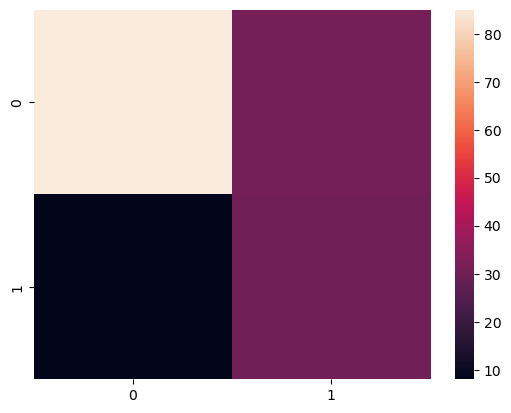

In [115]:
snp.heatmap(cm)

# Using the model for prediction

In [155]:
test_point=[5,10,72,19,0,25.8,0.587,51]
X_n=array(test_point)

In [156]:
X_n=X_n.reshape(1,-1)

In [157]:
X_n

<FloatingArray>
[
[5.0, 10.0, 72.0, 19.0, 0.0, 25.8, 0.587, 51.0]
]
Shape: (1, 8), dtype: Float64

In [158]:
X_n=scaler.transform(X_n)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [159]:
X_n

array([[ 0.34251733, -3.47100006,  0.14943625, -0.09444655, -0.69422979,
        -0.78582078,  0.34744888,  1.51276676]])

In [160]:
prediction=SVCModel.predict(X_n)

In [161]:
if prediction==0:
    print("The person isn't diabetic")
    
else:
    print("The person is diabetic")

The person isn't diabetic


# Trying another algorithm

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
DTModel=DecisionTreeClassifier(criterion='gini',max_depth=200,random_state=33)

In [191]:
DTModel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=200, random_state=33)

In [192]:
DTModel.score(X_train,y_train)

1.0

In [196]:
DTModel.score(X_test,y_test)  # Overfitting 

0.7467532467532467

In [198]:
y_pre2=DTModel.predict(X_test)

In [199]:
cm2=confusion_matrix(y_pre2,y_test)

In [200]:
cm2

array([[76, 22],
       [17, 39]], dtype=int64)

<AxesSubplot:>

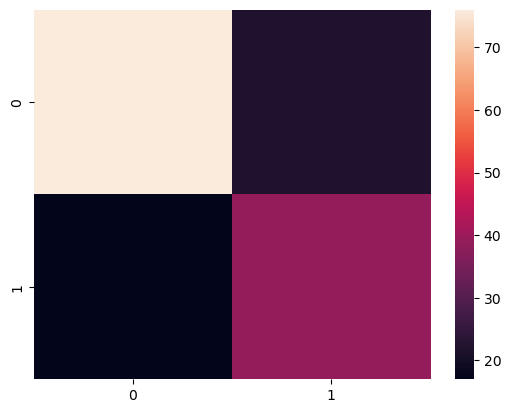

In [201]:
snp.heatmap(cm2)